In [1]:
import pandas as pd
import pyomo.environ as pyo

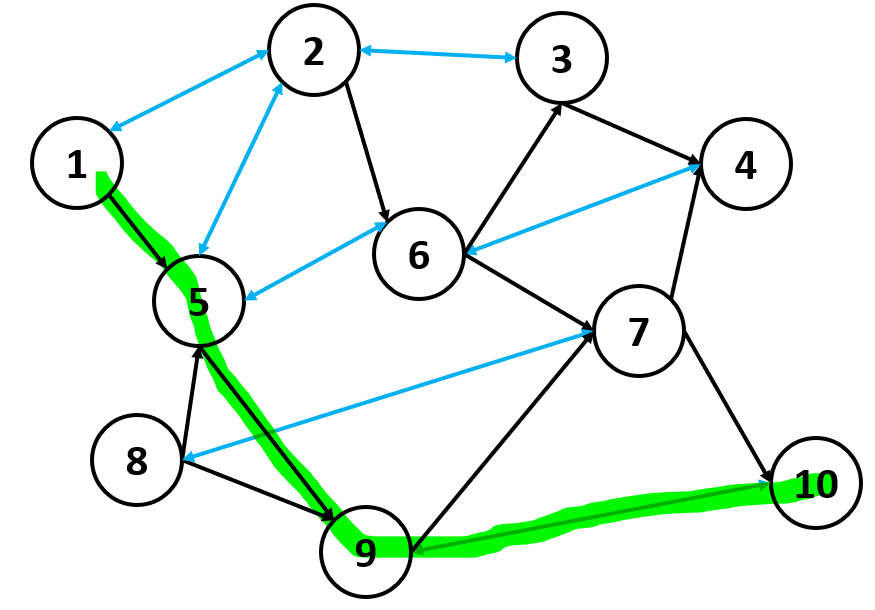

In [2]:
DistMat = pd.read_excel("distance_matrix_shortest_path.xlsx", header = 0, index_col = 0)

In [3]:
C = list(DistMat.columns)
R = list(DistMat.index)

DistMat

,1,2,3,4,5,6,7,8,9,10
1,1000000.000000,22.913435,1000000.000000,1000000.000000,19.811102,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000
2,22.913435,1000000.000000,91.004413,1000000.000000,54.425097,11.432559,1000000.000000,1000000.00000,1000000.000000,1000000.000000
3,1000000.000000,91.004413,1000000.000000,58.813041,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000
4,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,33.635534,1000000.000000,1000000.00000,1000000.000000,1000000.000000
5,1000000.000000,54.425097,1000000.000000,1000000.000000,1000000.000000,18.682737,1000000.000000,1000000.00000,20.055402,1000000.000000
6,1000000.000000,1000000.000000,53.585564,33.635534,18.682737,1000000.000000,91.921080,1000000.00000,1000000.000000,1000000.000000
7,1000000.000000,1000000.000000,1000000.000000,83.436119,1000000.000000,1000000.000000,1000000.000000,43.33605,1000000.000000,85.696612
8,1000000.000000,1000000.000000,1000000.000000,1000000.000000,71.946668,1000000.000000,43.336050,1000000.00000,49.799675,1000000.000000
9,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,77.862595,1000000.00000,1000000.000000,49.406673
10,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,49.406673,1000000.000000


In [4]:
def Shortest_Path(R,C,start, end):
    
    Dist = {(r, c):DistMat.at[r,c] for r in R for c in C}
    
    model = pyo.ConcreteModel(name="Shortest_Path")
    
    model.x = pyo.Var(R, C, within=pyo.Binary)
    
    def obj_rule(model):
        return sum(Dist[r,c]*model.x[r,c] for r in R for c in C)
    model.obj = pyo.Objective(rule = obj_rule)
    
    def balance_rule(model,c):
        if c == start:
            return sum( model.x[c,r] for r in R ) == 1
        elif c == end:
            return sum( model.x[r,c] for r in R ) == 1
        else:
            return sum( model.x[r,c] for r in R ) == sum( model.x[c,r] for r in R )
    model.balance = pyo.Constraint(C, rule = balance_rule)
    
    return model

In [5]:
model = Shortest_Path(R,C, start = 1, end = 10)

In [6]:
res = pyo.SolverFactory("glpk").solve(model)

print(pyo.check_optimal_termination(res))

True


In [7]:
print(f"Objective value = {pyo.value(model.obj)}")
print(" ")
print("Optimal Path:")
for r in R:
    for c in C:
        if pyo.value(model.x[r,c]) == 1:
            print(f"{r} => {c}", end=" ")

Objective value = 89.27317668617854
 
Optimal Path:
1 => 5 5 => 9 9 => 10 